In [ ]:
# https://www.kaggle.com/c/santander-product-recommendation/overview

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv("./train.csv")
test = pd.read_csv("./test.csv")
sample_submission = pd.read_csv("./sample_submission.csv")

c:\users\administrator\basic\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (5,8,11,15) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
c:\users\administrator\basic\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (15) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
sample_submission.tail()

,ncodpers,added_products
929610,1553685,ind_tjcr_fin_ult1
929611,1553686,ind_tjcr_fin_ult1
929612,1553687,ind_tjcr_fin_ult1
929613,1553688,ind_tjcr_fin_ult1
929614,1553689,ind_tjcr_fin_ult1


In [4]:
train.tail()

,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,...,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
13647304,2016-05-28,1166765,N,ES,V,22,2013-08-14,0.0,33,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
13647305,2016-05-28,1166764,N,ES,V,23,2013-08-14,0.0,33,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
13647306,2016-05-28,1166763,N,ES,H,47,2013-08-14,0.0,33,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
13647307,2016-05-28,1166789,N,ES,H,22,2013-08-14,0.0,33,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
13647308,2016-05-28,1550586,N,ES,H,37,2016-05-13,1.0,0,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0


In [5]:
test.tail()

,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,...,indext,conyuemp,canal_entrada,indfall,tipodom,cod_prov,nomprov,ind_actividad_cliente,renta,segmento
929610,2016-06-28,660237,N,ES,V,55,1999-04-21,0,206,1,...,N,NaN,KAT,N,1,28.0,MADRID,1,128643.57,01 - TOP
929611,2016-06-28,660238,N,ES,V,30,2006-11-29,0,115,1,...,N,NaN,KFC,N,1,26.0,"RIOJA, LA",0,NA,02 - PARTICULARES
929612,2016-06-28,660240,N,ES,V,52,2006-11-29,0,115,1,...,N,NaN,KBZ,N,1,33.0,ASTURIAS,1,72765.27,02 - PARTICULARES
929613,2016-06-28,660243,N,ES,V,32,2006-11-29,0,115,1,...,N,NaN,KFC,N,1,33.0,ASTURIAS,0,147488.88,02 - PARTICULARES
929614,2016-06-28,660248,N,ES,V,92,2006-11-29,0,115,1,...,N,NaN,KAT,N,1,45.0,TOLEDO,0,NA,02 - PARTICULARES


#### column descriptions

- fecha_dato : the table is partitioned for this column(해당 데이터를 만든? 날짜라고 생각하면 될듯..)


- ncodpers : customer code (고객 코드, 코드-고객 1:1매칭.. 중복되는 코드가 있을 수 있다)


- ind_empleado : employee index (A active, B ex employed, F filial, N not employee, P pasive)


- pais_residencia : customer's country residence (고객 국적)


- sexo : customers's sex(고객 성별)


- age : age(고객 나이)


-  fecha_alta : the date in which the customer became as the first holder of a contract in the bank
(계약 시작 날짜로 생각하면 될듯)


- ind_nuevo : new customer index. 1 if the customer registered in the last 6 months(최근 6개월 내 계약한 고객)


- antiguedad : customer seniority(in months) fecha_alta와 fecha_dato사이 간격(개월 수)


- indrel : 1(First/primary), 99(primary customer during the month but not at the end of the month)


- ult_fec_cli_1t : last date as primary customer(if he isn't at the end of the month)


- indrel_1mes : customer type at the beginning of the month, 1 (First/Primary customer), 2 (co-owner),P (Potential),3 (former primary), 4(former co-owner)


- tiprel_1mes : customer relation type at the beginning of the month.  A (active), I (inactive), P (former customer),R (Potential)


- indresi : residence index (S (Yes) or N (No) if the residence country is the same than the bank country)


- indext : Foreigner index (S (Yes) or N (No) if the customer's birth country is different than the bank country)


- conyuemp : spouse index. 1 if the customer is spouse of an employee


- canal_entrada : channel used by the customer to join


- indfall : deceased index. N/S


- tipodom : address type. 1, primary address


- cod-prov : province cod(customer's address)


- nomprov : province name


- ind_actividad_cliente : activity index(1 : active customer, 0 : inactive customer)


- renta : gross income of the household


- segmento : segmentation: 01 - VIP, 02 - Individuals 03 - college graduated

In [6]:
train.isnull().any()

fecha_dato               False
ncodpers                 False
ind_empleado              True
pais_residencia           True
sexo                      True
age                      False
fecha_alta                True
ind_nuevo                 True
antiguedad               False
indrel                    True
ult_fec_cli_1t            True
indrel_1mes               True
tiprel_1mes               True
indresi                   True
indext                    True
conyuemp                  True
canal_entrada             True
indfall                   True
tipodom                   True
cod_prov                  True
nomprov                   True
ind_actividad_cliente     True
renta                     True
segmento                  True
ind_ahor_fin_ult1        False
ind_aval_fin_ult1        False
ind_cco_fin_ult1         False
ind_cder_fin_ult1        False
ind_cno_fin_ult1         False
ind_ctju_fin_ult1        False
ind_ctma_fin_ult1        False
ind_ctop_fin_ult1        False
ind_ctpp

In [7]:
train.isnull().sum()

fecha_dato                      0
ncodpers                        0
ind_empleado                27734
pais_residencia             27734
sexo                        27804
age                             0
fecha_alta                  27734
ind_nuevo                   27734
antiguedad                      0
indrel                      27734
ult_fec_cli_1t           13622516
indrel_1mes                149781
tiprel_1mes                149781
indresi                     27734
indext                      27734
conyuemp                 13645501
canal_entrada              186126
indfall                     27734
tipodom                     27735
cod_prov                    93591
nomprov                     93591
ind_actividad_cliente       27734
renta                     2794375
segmento                   189368
ind_ahor_fin_ult1               0
ind_aval_fin_ult1               0
ind_cco_fin_ult1                0
ind_cder_fin_ult1               0
ind_cno_fin_ult1                0
ind_ctju_fin_u

In [8]:
test.isnull().any()

fecha_dato               False
ncodpers                 False
ind_empleado             False
pais_residencia          False
sexo                      True
age                      False
fecha_alta               False
ind_nuevo                False
antiguedad               False
indrel                   False
ult_fec_cli_1t            True
indrel_1mes               True
tiprel_1mes               True
indresi                  False
indext                   False
conyuemp                  True
canal_entrada             True
indfall                  False
tipodom                  False
cod_prov                  True
nomprov                   True
ind_actividad_cliente    False
renta                    False
segmento                  True
dtype: bool

In [9]:
# train data에서 product에 해당하는 column들.
product_columns = train.columns[24:]

# customer 특성에 해당하는 column들
customer_columns = train.columns[:24]

In [10]:
for col in product_columns :
    print(train[col].value_counts())
    print()
    
# product와 관련된 상품들의 value는 모두 0 또는 1로 구성되어있음
# 0인경우 해당 product가 없는(계약하지않은) 상태이고, 1인 경우 해당 product를 가진(계약한) 상태라고 추측 가능
# binary 문제를 푸는 거라고 생각하면 조금 쉬워지는듯!

0    13645913
1        1396
Name: ind_ahor_fin_ult1, dtype: int64

0    13646993
1         316
Name: ind_aval_fin_ult1, dtype: int64

1    8945588
0    4701721
Name: ind_cco_fin_ult1, dtype: int64

0    13641933
1        5376
Name: ind_cder_fin_ult1, dtype: int64

0    12543689
1     1103620
Name: ind_cno_fin_ult1, dtype: int64

0    13518012
1      129297
Name: ind_ctju_fin_ult1, dtype: int64

0    13514567
1      132742
Name: ind_ctma_fin_ult1, dtype: int64

0    11886693
1     1760616
Name: ind_ctop_fin_ult1, dtype: int64

0    13056301
1      591008
Name: ind_ctpp_fin_ult1, dtype: int64

0    13623034
1       24275
Name: ind_deco_fin_ult1, dtype: int64

0    13624641
1       22668
Name: ind_deme_fin_ult1, dtype: int64

0    13060928
1      586381
Name: ind_dela_fin_ult1, dtype: int64

0    12518082
1     1129227
Name: ind_ecue_fin_ult1, dtype: int64

0    13395025
1      252284
Name: ind_fond_fin_ult1, dtype: int64

0    13566973
1       80336
Name: ind_hip_fin_ult1, dtype: int64



#### 각 column의 NaN값들을 어떻게 채울 것인지 고민이 필요함

In [11]:
# 고객 code
print(train["ncodpers"].isnull().any())
train["ncodpers"].value_counts()

# 956645명의 unique한 고객들이 있으며, 고객 기록은 1명당 1~17개

False


32752      17
1273696    17
1224536    17
1199940    17
1208128    17
           ..
1549150     1
1543059     1
1535935     1
1551255     1
1489485     1
Name: ncodpers, Length: 956645, dtype: int64

In [12]:
print(train["ncodpers"].isnull().any())
test["ncodpers"].value_counts

False


<bound method IndexOpsMixin.value_counts of 0           15889
1         1170544
2         1170545
3         1170547
4         1170548
           ...   
929610     660237
929611     660238
929612     660240
929613     660243
929614     660248
Name: ncodpers, Length: 929615, dtype: int64>

In [13]:
train["ind_empleado"].unique(), test["ind_empleado"].unique()

(array(['N', nan, 'A', 'B', 'F', 'S'], dtype=object),
 array(['F', 'N', 'A', 'B', 'S'], dtype=object))

In [15]:
print(train["ind_empleado"].isnull().any())
train["ind_empleado"].value_counts()

# 정확히 어떤 column인지는 알지 못하지만, 해당 product를 계약한 은행 직원의 고용상태로 추측함
# A(active)는 현재도 일하고있는, B(ex employed)는 과거에 일했던.. 이런식으로

True


N    13610977
B        3566
F        2523
A        2492
S          17
Name: ind_empleado, dtype: int64

In [16]:
# 가장 많은 케이스인 N으로 nan값을 채워준다.

train["ind_empleado"].fillna(value = "N", inplace = True)
print(train["ind_empleado"].isnull().any())

False


In [17]:
train["pais_residencia"].unique()

array(['ES', nan, 'CA', 'CH', 'CL', 'IE', 'AT', 'NL', 'FR', 'GB', 'DE',
       'DO', 'BE', 'AR', 'VE', 'US', 'MX', 'BR', 'IT', 'EC', 'PE', 'CO',
       'HN', 'FI', 'SE', 'AL', 'PT', 'MZ', 'CN', 'TW', 'PL', 'IN', 'CR',
       'NI', 'HK', 'AD', 'CZ', 'AE', 'MA', 'GR', 'PR', 'RO', 'IL', 'RU',
       'GT', 'GA', 'NO', 'SN', 'MR', 'UA', 'BG', 'PY', 'EE', 'SV', 'ET',
       'CM', 'SA', 'CI', 'QA', 'LU', 'PA', 'BA', 'BO', 'AU', 'BY', 'KE',
       'SG', 'HR', 'MD', 'SK', 'TR', 'AO', 'CU', 'GQ', 'EG', 'ZA', 'DK',
       'UY', 'GE', 'TH', 'DZ', 'LB', 'JP', 'NG', 'PK', 'TN', 'TG', 'KR',
       'GH', 'RS', 'VN', 'PH', 'KW', 'NZ', 'MM', 'KH', 'GI', 'SL', 'GN',
       'GW', 'OM', 'CG', 'LV', 'LT', 'ML', 'MK', 'HU', 'IS', 'LY', 'CF',
       'GM', 'KZ', 'CD', 'BZ', 'ZW', 'DJ', 'JM', 'BM', 'MT'], dtype=object)

In [18]:
print(train["pais_residencia"].isnull().any())
train["pais_residencia"].value_counts()

# 고객의 국적 ES가 제일많고 FR, AR...순

True


ES    13553710
FR        5161
AR        4835
DE        4625
GB        4605
        ...   
DJ          11
JM          11
ZW          11
BM           6
MT           2
Name: pais_residencia, Length: 118, dtype: int64

In [19]:
# 가장 많은 케이스인 ES으로 nan값을 채워준다.

train["pais_residencia"].fillna(value = "ES", inplace = True)
print(train["pais_residencia"].isnull().any())

False


In [17]:
train["sexo"].unique()

array(['H', 'V', nan], dtype=object)

In [21]:
print(train["sexo"].isnull().any())
train["sexo"].value_counts()

# 고객의 성별
# 아마 남자가 H, 여자가 V인것으로 추정.. hombre..

True


V    7424252
H    6195253
Name: sexo, dtype: int64

In [22]:
test["sexo"].unique()

array(['V', 'H', nan], dtype=object)

In [20]:
print(test["sexo"].isnull().any())
test["sexo"].value_counts()

True


V    504515
H    425095
Name: sexo, dtype: int64

In [23]:
# sexo column이 nan인 index들중 반을 sample method로 뽑아 V로 나머지는 H로.. 반은 여자 반은 남자
V_index = train[train["sexo"].isnull()].sample(n = int(train["sexo"].isnull().sum() / 2), random_state = 1).index

train.loc[V_index, "sexo"] = "V"

train["sexo"].fillna(value = "H", inplace = True)

print(train["sexo"].isnull().any())

False


In [24]:
V_index = test[test["sexo"].isnull()].sample(n = int(test["sexo"].isnull().sum() / 2), random_state = 1).index

test.loc[V_index, "sexo"] = "V"

test["sexo"].fillna(value = "H", inplace = True)

print(test["sexo"].isnull().any())

False


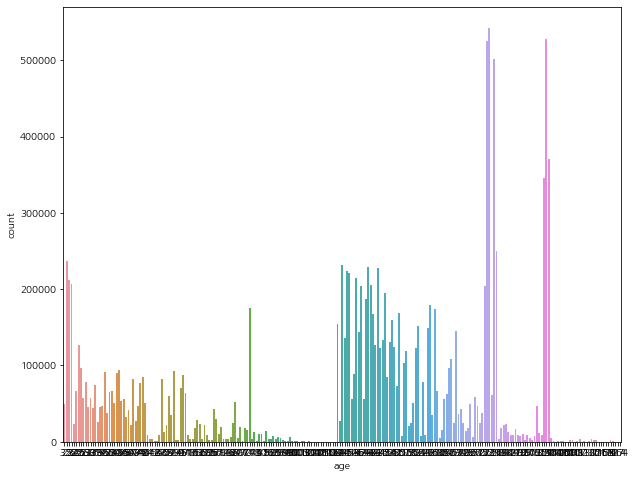

In [25]:
plt.figure(figsize = (10, 8))
sns.countplot(train["age"])
plt.show()

In [26]:
train["age"].value_counts()

# 고객들의 나이.. 100이 넘어가는건 무엇일까..

23     542682
24     527526
22     524620
21     500941
20     370847
        ...  
116        12
163         8
127         8
164         3
126         3
Name: age, Length: 235, dtype: int64

In [27]:
train["age"].unique()

array([' 35', ' 23', ' 22', ' 24', ' 65', ' 28', ' 25', ' 26', ' 53',
       ' 27', ' 32', ' 37', ' 31', ' 39', ' 63', ' 33', ' 55', ' 42',
       ' 58', ' 38', ' 50', ' 30', ' 45', ' 44', ' 36', ' 29', ' 60',
       ' 57', ' 67', ' 47', ' NA', ' 34', ' 48', ' 46', ' 54', ' 84',
       ' 15', ' 12', '  8', '  6', ' 83', ' 40', ' 77', ' 69', ' 52',
       ' 59', ' 43', ' 10', '  9', ' 49', ' 41', ' 51', ' 78', ' 16',
       ' 11', ' 73', ' 62', ' 66', ' 17', ' 68', ' 82', ' 95', ' 96',
       ' 56', ' 61', ' 79', ' 72', ' 14', ' 19', ' 13', ' 86', ' 64',
       ' 20', ' 89', ' 71', '  7', ' 70', ' 74', ' 21', ' 18', ' 75',
       '  4', ' 80', ' 81', '  5', ' 76', ' 92', ' 93', ' 85', ' 91',
       ' 87', ' 90', ' 94', ' 99', ' 98', ' 88', ' 97', '100', '101',
       '106', '103', '  3', '  2', '102', '104', '111', '107', '109',
       '105', '112', '115', '110', '116', '108', '113', 37, 81, 43, 30,
       45, 41, 67, 59, 46, 36, 47, 69, 39, 44, 40, 38, 34, 42, 31, 35, 48,
       60, 54

In [28]:
# " Na" 값을 먼저 nan으로 바꾼다..
train.loc[train["age"] == " NA", "age"] = np.NaN

In [29]:
# 공백이 포함되서 문자열로 인식되는걸 숫자로 바꿔준다
train["age"] = pd.to_numeric(train["age"])

In [30]:
train["age"].unique()

array([ 35.,  23.,  22.,  24.,  65.,  28.,  25.,  26.,  53.,  27.,  32.,
        37.,  31.,  39.,  63.,  33.,  55.,  42.,  58.,  38.,  50.,  30.,
        45.,  44.,  36.,  29.,  60.,  57.,  67.,  47.,  nan,  34.,  48.,
        46.,  54.,  84.,  15.,  12.,   8.,   6.,  83.,  40.,  77.,  69.,
        52.,  59.,  43.,  10.,   9.,  49.,  41.,  51.,  78.,  16.,  11.,
        73.,  62.,  66.,  17.,  68.,  82.,  95.,  96.,  56.,  61.,  79.,
        72.,  14.,  19.,  13.,  86.,  64.,  20.,  89.,  71.,   7.,  70.,
        74.,  21.,  18.,  75.,   4.,  80.,  81.,   5.,  76.,  92.,  93.,
        85.,  91.,  87.,  90.,  94.,  99.,  98.,  88.,  97., 100., 101.,
       106., 103.,   3.,   2., 102., 104., 111., 107., 109., 105., 112.,
       115., 110., 116., 108., 113., 126., 117., 163., 127., 114., 164.])

In [31]:
# 나이가 너무 적거나 너무 많은 경우가 있다...
# nan값은 평균값으로 바꾸고..
# 너무 적거나 너무 많은 경우는 일정 범위의 평균값으로 바꿔보자..
train.loc[train["age"] < 18, "age"] = train.loc[(train["age"] >= 18) & (train["age"] <= 30), "age"].mean()
train.loc[train["age"] > 100, "age"] = train.loc[(train["age"] >= 31) & (train["age"] <= 100), "age"].mean()

train["age"].fillna(value = train["age"].mean(), inplace = True)

print(train["age"].isnull().any())

# 나이는 int형태로 바꿔준다
train["age"] = train["age"].astype(int)

False


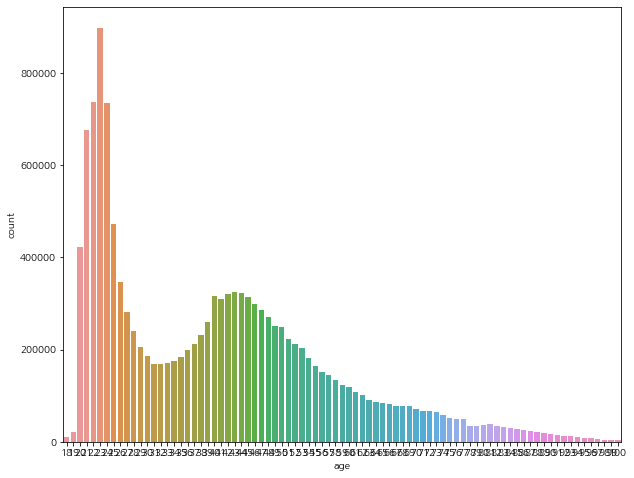

In [32]:
# age column을 정리하고나니 훨씬 깔끔한 그래프 형태가 되었다..

plt.figure(figsize = (10, 8))
sns.countplot(train["age"])
plt.show()

In [33]:
test["age"].unique()

array([ 56,  36,  22,  51,  41,  33,  23,  43,  63,  62,  32,  58,  71,
        31,  30,  59,  45,  37,  39,  38,  46,  34,  35,  42,  29,  88,
        64,  48,  72,  47,  27,  24,  50,  49,  57,  67,  25,  28,  13,
        40,  53,  54,  26,  11,  21,  60,  44,  55,   7,  52,  66,  90,
        73,  78,  79,  61,  69,  12,   9,  65,  77,  83,  81,  10,   5,
        18,  17,  87,  70,  80,  75,  68,  74,  16,   4,  82,  91,  76,
        19,  15,   6,  97,  89,  85,  86,  14,  20,   8,  84,  95,  93,
       100,  96,  92,  98,  94, 105, 102, 101, 104, 103,  99,   3,   2,
       116, 106, 107, 109, 110, 117, 108, 113, 111, 112, 114, 164, 118,
       127], dtype=int64)

In [34]:
# 날짜관련 column들이 string으로 되어있어서 datetime형태로 바꾸어준다
train["fecha_dato"] = pd.to_datetime(train["fecha_dato"], format = "%Y-%m-%d")
train["fecha_alta"] = pd.to_datetime(train["fecha_alta"], format = "%Y-%m-%d")

In [35]:
test["fecha_dato"] = pd.to_datetime(test["fecha_dato"], format = "%Y-%m-%d")
test["fecha_alta"] = pd.to_datetime(test["fecha_alta"], format = "%Y-%m-%d")

In [36]:
train["fecha_alta"].unique()

array(['2015-01-12T00:00:00.000000000', '2012-08-10T00:00:00.000000000',
                                 'NaT', ...,
       '2016-05-25T00:00:00.000000000', '2016-05-01T00:00:00.000000000',
       '2016-05-15T00:00:00.000000000'], dtype='datetime64[ns]')

In [37]:
train["fecha_alta"].value_counts()

2014-07-28    57389
2014-10-03    54287
2014-08-04    45746
2013-10-14    40804
2013-08-03    33414
              ...  
1995-04-29       11
2015-05-31        9
2014-05-01        7
2010-07-04        4
2009-12-25        4
Name: fecha_alta, Length: 6756, dtype: int64

In [38]:
median_date = train["fecha_alta"].value_counts().index[0]
median_date

Timestamp('2014-07-28 00:00:00')

In [39]:
# fecha_alta column의 nan값은.. median값으로 바꾼다.
train["fecha_alta"].fillna(value = median_date, inplace = True)
print(train["fecha_alta"].isnull().any())

False


In [40]:
train["ind_nuevo"].unique()

array([ 0., nan,  1.])

In [41]:
train["ind_nuevo"].value_counts()

# 최근 6개월내에 등록된 고객은 1

0.0    12808368
1.0      811207
Name: ind_nuevo, dtype: int64

In [42]:
# ind_nuevo column이 NaN인 고객들의 기록을 보고 6개월이하면 1로 채워준다
train[train["ind_nuevo"].isnull()].groupby("ncodpers", sort = False).size().max()

6

In [43]:
train["ind_nuevo"].fillna(value = 1, inplace = True)
print(train["ind_nuevo"].isnull().any())

False


In [44]:
# antiguedad
train["antiguedad"] = train["antiguedad"].astype("str")

In [45]:
train["antiguedad"].unique()

array(['      6', '     35', '     34', '     NA', '     33', '     31',
       '     21', '     16', '     27', '      9', '     22', '     13',
       '     29', '      8', '     11', '     10', '     28', '     24',
       '      7', '     25', '     14', '     26', '     12', '     23',
       '      1', '     18', '      4', '      3', '     17', '     32',
       '     30', '     20', '     15', '     19', '    157', '     36',
       '      5', '     40', '     38', '     37', '     39', '      0',
       '      2', '     47', '     44', '     42', '     46', '     45',
       '     43', '     41', '     57', '     48', '     52', '     49',
       '     50', '     56', '     58', '     51', '     55', '     54',
       '     53', '     59', '     62', '     61', '     60', '     63',
       '    139', '    165', '    118', '    164', '    142', '     94',
       '    159', '    143', '    105', '    151', '    162', '    137',
       '    150', '    128', '    122', '    156', 

In [46]:
train["antiguedad"] = pd.to_numeric(train["antiguedad"], errors = "coerce")
# train["antiguedad"].astype("int")

In [47]:
train["antiguedad"].unique()

array([ 6.00000e+00,  3.50000e+01,  3.40000e+01,          nan,
        3.30000e+01,  3.10000e+01,  2.10000e+01,  1.60000e+01,
        2.70000e+01,  9.00000e+00,  2.20000e+01,  1.30000e+01,
        2.90000e+01,  8.00000e+00,  1.10000e+01,  1.00000e+01,
        2.80000e+01,  2.40000e+01,  7.00000e+00,  2.50000e+01,
        1.40000e+01,  2.60000e+01,  1.20000e+01,  2.30000e+01,
        1.00000e+00,  1.80000e+01,  4.00000e+00,  3.00000e+00,
        1.70000e+01,  3.20000e+01,  3.00000e+01,  2.00000e+01,
        1.50000e+01,  1.90000e+01,  1.57000e+02,  3.60000e+01,
        5.00000e+00,  4.00000e+01,  3.80000e+01,  3.70000e+01,
        3.90000e+01,  0.00000e+00,  2.00000e+00,  4.70000e+01,
        4.40000e+01,  4.20000e+01,  4.60000e+01,  4.50000e+01,
        4.30000e+01,  4.10000e+01,  5.70000e+01,  4.80000e+01,
        5.20000e+01,  4.90000e+01,  5.00000e+01,  5.60000e+01,
        5.80000e+01,  5.10000e+01,  5.50000e+01,  5.40000e+01,
        5.30000e+01,  5.90000e+01,  6.20000e+01,  6.100

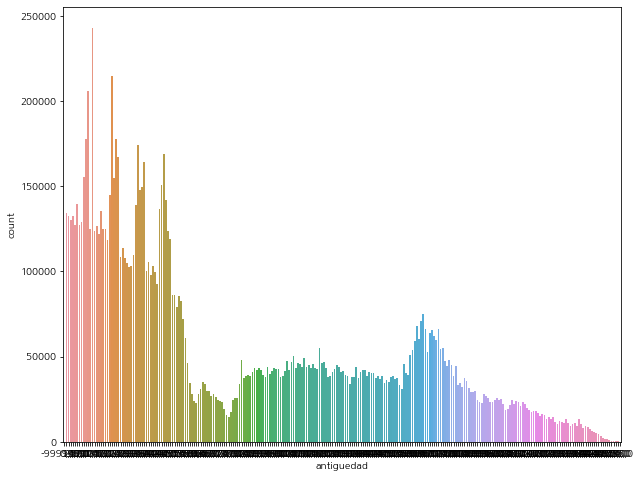

In [48]:
plt.figure(figsize = (10, 8))
sns.countplot(train["antiguedad"])
plt.show()

In [49]:
# -99999는 0으로, nan값은.. 최소값으로..?
train.loc[train["antiguedad"] < 0, "antiguedad"] = 0
train.loc[train["antiguedad"].isnull(), "antiguedad"] = train["antiguedad"].min()

print(train["antiguedad"].isnull().any())

False


In [54]:
train["indrel"].unique()

array([ 1., 99.])

In [51]:
train["indrel"].value_counts()

1.0     13594782
99.0       24793
Name: indrel, dtype: int64

In [52]:
test["indrel"].value_counts()

1     927932
99      1683
Name: indrel, dtype: int64

In [53]:
train["indrel"].fillna(value = 1, inplace = True)
print(train["indrel"].isnull().any())

False


In [56]:
train["ult_fec_cli_1t"].unique(), test["ult_fec_cli_1t"].unique()

(array([nan, '2015-07-02', '2015-07-23', '2015-07-06', '2015-07-30',
        '2015-07-20', '2015-07-08', '2015-07-22', '2015-07-17',
        '2015-07-09', '2015-07-03', '2015-07-29', '2015-07-13',
        '2015-07-21', '2015-07-27', '2015-07-14', '2015-07-01',
        '2015-07-24', '2015-07-15', '2015-07-16', '2015-07-28',
        '2015-07-07', '2015-07-10', '2015-08-21', '2015-08-19',
        '2015-08-25', '2015-08-14', '2015-08-24', '2015-08-17',
        '2015-08-18', '2015-08-10', '2015-08-13', '2015-08-27',
        '2015-08-03', '2015-08-06', '2015-08-20', '2015-08-26',
        '2015-08-28', '2015-08-05', '2015-08-11', '2015-08-07',
        '2015-08-04', '2015-08-12', '2015-09-17', '2015-09-01',
        '2015-09-18', '2015-09-03', '2015-09-02', '2015-09-14',
        '2015-09-16', '2015-09-29', '2015-09-28', '2015-09-09',
        '2015-09-22', '2015-09-08', '2015-09-11', '2015-09-21',
        '2015-09-04', '2015-09-25', '2015-09-07', '2015-09-10',
        '2015-09-23', '2015-09-24',

In [57]:
train["ult_fec_cli_1t"].value_counts()

2015-12-24    763
2015-12-28    521
2015-07-09    443
2015-07-06    405
2015-07-01    401
             ... 
2015-08-19     44
2016-04-28     44
2015-08-06     41
2016-01-04     34
2015-12-23     27
Name: ult_fec_cli_1t, Length: 223, dtype: int64

In [58]:
test["ult_fec_cli_1t"].value_counts()

2016-06-01    138
2016-06-10    133
2016-06-03    110
2016-06-07    102
2016-06-06    101
2016-06-13     84
2016-06-20     84
2016-06-15     78
2016-06-23     78
2016-06-17     78
2016-06-14     76
2016-06-09     75
2016-06-02     75
2016-06-22     72
2016-06-21     70
2016-06-24     64
2016-06-16     62
2016-06-08     60
2016-06-27     58
2016-06-28     49
2016-06-29     36
Name: ult_fec_cli_1t, dtype: int64

In [59]:
# ult_fec_cli_1t column은 nan값이 너무 많다...
train.drop(labels = "ult_fec_cli_1t", axis = 1, inplace = True)
test.drop(labels = "ult_fec_cli_1t", axis = 1, inplace = True)

In [60]:
train["indrel_1mes"].unique(), test["indrel_1mes"].unique()

(array([1.0, nan, 3.0, 2.0, '1.0', '1', '3', '3.0', '2.0', '4.0', 'P', '4',
        4.0, '2'], dtype=object),
 array([ 1.,  3., nan]))

In [61]:
train["indrel_1mes"].value_counts()

1.0    7277607
1.0    4017746
1      2195328
3.0       1804
3.0       1409
3         1137
P          874
2          483
2.0        479
2.0        355
4.0        143
4.0         93
4           70
Name: indrel_1mes, dtype: int64

In [62]:
test["indrel_1mes"].value_counts()

1.0    929565
3.0        27
Name: indrel_1mes, dtype: int64

In [63]:
indrel_dict = {1.0 : "1", 3.0 : "3", 2.0 : "2", '1.0' : "1", '3.0' : "3", '2.0' : "2",
               '4.0' : "4", 4.0 : "4"}

train["indrel_1mes"].apply(lambda x : indrel_dict.get(x , x))
train["indrel_1mes"].fillna(value = "P", inplace = True)

print(train["indrel_1mes"].isnull().any())

test["indrel_1mes"].fillna(value = "P", inplace = True)

print(test["indrel_1mes"].isnull().any())

False
False


In [65]:
train["tiprel_1mes"].unique(), test["tiprel_1mes"].unique()

(array(['A', 'I', nan, 'P', 'R', 'N'], dtype=object),
 array(['A', 'I', 'P', nan], dtype=object))

In [66]:
train["tiprel_1mes"].value_counts()

I    7304875
A    6187123
P       4656
R        870
N          4
Name: tiprel_1mes, dtype: int64

In [67]:
test["tiprel_1mes"].value_counts()

I    535943
A    393622
P        27
Name: tiprel_1mes, dtype: int64

In [68]:
train["tiprel_1mes"].fillna(value = "I", inplace = True)
print(train["tiprel_1mes"].isnull().any())

test["tiprel_1mes"].fillna(value = "I", inplace = True)
print(test["tiprel_1mes"].isnull().any())

False
False


In [69]:
train["indresi"].unique()

array(['S', nan, 'N'], dtype=object)

In [70]:
train["indresi"].value_counts()

S    13553711
N       65864
Name: indresi, dtype: int64

In [71]:
train["indresi"].fillna(value = "S", inplace = True)
print(train["indresi"].isnull().any())

False


In [72]:
train["indext"].unique()

array(['N', 'S', nan], dtype=object)

In [73]:
train["indext"].value_counts()

N    12974839
S      644736
Name: indext, dtype: int64

In [74]:
train["indext"].fillna(value = "N", inplace = True)
print(train["indext"].isnull().any())

False


In [75]:
# conyuemp column은 nan값이 너무 많다...
train.drop(labels = "conyuemp", axis = 1, inplace = True)
test.drop(labels = "conyuemp", axis = 1, inplace = True)

In [76]:
train["canal_entrada"].unique(), test["canal_entrada"].unique()

(array(['KHL', 'KHE', 'KHD', 'KFA', 'KFC', 'KAT', nan, 'KAZ', 'RED', 'KHC',
        'KHK', 'KGN', 'KHM', 'KHO', 'KDH', 'KEH', 'KAD', 'KBG', 'KGC',
        'KHF', 'KFK', 'KHN', 'KHA', 'KAF', 'KGX', 'KFD', 'KAG', 'KFG',
        'KAB', 'KCC', 'KAE', 'KAH', 'KAR', 'KFJ', 'KFL', 'KAI', 'KFU',
        'KAQ', 'KFS', 'KAA', 'KFP', 'KAJ', 'KFN', 'KGV', 'KGY', 'KFF',
        'KAP', 'KDE', 'KFV', '013', 'K00', 'KAK', 'KCK', 'KCL', 'KAY',
        'KBU', 'KDR', 'KAC', 'KDT', 'KCG', 'KDO', 'KDY', 'KBQ', 'KDA',
        'KBO', 'KCI', 'KEC', 'KBZ', 'KES', 'KDX', 'KAS', '007', 'KEU',
        'KCA', 'KAL', 'KDC', 'KAW', 'KCS', 'KCB', 'KDU', 'KDQ', 'KCN',
        'KCM', '004', 'KCH', 'KCD', 'KCE', 'KEV', 'KBL', 'KEA', 'KBH',
        'KDV', 'KFT', 'KEY', 'KAO', 'KEJ', 'KEO', 'KEI', 'KEW', 'KDZ',
        'KBV', 'KBR', 'KBF', 'KDP', 'KCO', 'KCF', 'KCV', 'KAM', 'KEZ',
        'KBD', 'KAN', 'KBY', 'KCT', 'KDD', 'KBW', 'KCU', 'KBX', 'KDB',
        'KBS', 'KBE', 'KCX', 'KBP', 'KBN', 'KEB', 'KDS', 'KEL', 'KDG',
 

In [77]:
train["canal_entrada"].value_counts()

KHE    4055270
KAT    3268209
KFC    3098360
KHQ     591039
KFA     409669
        ...   
KGN         17
KDL         11
025         11
KHS          5
KHR          1
Name: canal_entrada, Length: 162, dtype: int64

In [78]:
train["canal_entrada"].fillna(value = "KHE", inplace = True)
print(train["canal_entrada"].isnull().any())

False


In [79]:
test["canal_entrada"].value_counts()

KHE    251665
KAT    205833
KFC    200697
KHQ     74969
KHM     33384
        ...  
KHR         1
025         1
KDB         1
KGN         1
KDL         1
Name: canal_entrada, Length: 162, dtype: int64

In [80]:
test["canal_entrada"].fillna(value = "KHE", inplace = True)
print(test["canal_entrada"].isnull().any())

False


In [81]:
train["indfall"].unique()

array(['N', nan, 'S'], dtype=object)

In [82]:
train["indfall"].value_counts()

N    13584813
S       34762
Name: indfall, dtype: int64

In [83]:
train["indfall"].fillna(value = "N", inplace = True)
print(train["indfall"].isnull().any())

False


In [84]:
train["tipodom"].unique()

array([ 1., nan])

In [85]:
train["tipodom"].value_counts()

1.0    13619574
Name: tipodom, dtype: int64

In [86]:
test["tipodom"].unique()

array([1], dtype=int64)

In [87]:
# tipodom column은.. 1 아님 nan인데 1이 압도적으로 많고 모두 같은 값이므로 가져갈 필요가 없다..
train.drop(labels = "tipodom", axis = 1, inplace = True)
test.drop(labels = "tipodom", axis = 1, inplace = True)

In [88]:
train["cod_prov"].unique()

array([29., 13., 50., 45., 24., 20., 10., 17., 49.,  8., 37.,  9., 22.,
       31.,  5., 40., 27., 25., 28.,  3., 42., 41., 39.,  7., 47., 36.,
       46., 44., 15., 32., 23., 16., 48., 12., 26.,  2.,  6., 30., 11.,
       nan,  4., 19., 34., 35., 14., 21., 18., 33., 38., 52., 43.,  1.,
       51.])

In [89]:
train["cod_prov"].value_counts()

28.0    4409600
8.0     1275219
46.0     682304
41.0     605164
15.0     429322
30.0     396759
29.0     367023
50.0     342543
3.0      313397
11.0     294684
36.0     280026
33.0     265749
47.0     238259
35.0     235700
6.0      192996
48.0     185888
45.0     183067
18.0     178562
37.0     164238
39.0     155706
14.0     144679
10.0     129912
7.0      124933
21.0     122283
13.0     119390
2.0      114128
12.0     104295
43.0     100115
9.0       97188
17.0      90538
31.0      88618
26.0      85202
27.0      84962
32.0      84009
24.0      83003
25.0      79059
20.0      71567
38.0      70968
19.0      64618
23.0      64363
4.0       60291
16.0      57310
49.0      50927
34.0      49282
40.0      42341
22.0      40181
5.0       38783
1.0       37704
44.0      22525
42.0      17660
52.0       9460
51.0       7218
Name: cod_prov, dtype: int64

In [98]:
train["cod_prov"].fillna(value = 28, inplace = True)
print(train["cod_prov"].isnull().any())

False


In [90]:
test["cod_prov"].unique()

array([28.,  3., 15.,  8.,  7., 35., 45., 14., 30., 16., 29., 23., 11.,
       41., 46., 12.,  6., 32., 17., 18., 13., 39., 10., 52., 33., 50.,
       22., 44., 27.,  9., 31., 47., 37., 26., 25., 24., 20., 43., 42.,
        2., 40., 21., 36.,  4.,  5., 34., 19.,  1., 49., 38., nan, 48.,
       51.])

In [91]:
test["cod_prov"].value_counts()

28.0    298250
8.0      88579
46.0     47996
41.0     40492
15.0     28715
30.0     27752
29.0     24546
50.0     23160
3.0      22147
11.0     19795
36.0     18961
33.0     18300
35.0     16332
47.0     16018
6.0      12936
45.0     12658
48.0     12494
18.0     12392
37.0     11071
39.0     10824
14.0      9831
7.0       9130
10.0      8598
13.0      8075
21.0      8018
2.0       7780
43.0      7631
12.0      7145
9.0       6645
17.0      6304
31.0      6010
26.0      5806
24.0      5717
27.0      5656
32.0      5605
25.0      5430
38.0      5097
20.0      4869
19.0      4678
23.0      4496
4.0       4307
16.0      3788
49.0      3430
34.0      3311
40.0      2881
22.0      2789
5.0       2628
1.0       2591
44.0      1538
42.0      1261
52.0       643
51.0       513
Name: cod_prov, dtype: int64

In [92]:
test["cod_prov"].fillna(value = 28, inplace = True)
print(test["cod_prov"].isnull().any())

False


In [93]:
train["nomprov"].unique()

array(['MALAGA', 'CIUDAD REAL', 'ZARAGOZA', 'TOLEDO', 'LEON', 'GIPUZKOA',
       'CACERES', 'GIRONA', 'ZAMORA', 'BARCELONA', 'SALAMANCA', 'BURGOS',
       'HUESCA', 'NAVARRA', 'AVILA', 'SEGOVIA', 'LUGO', 'LERIDA',
       'MADRID', 'ALICANTE', 'SORIA', 'SEVILLA', 'CANTABRIA',
       'BALEARS, ILLES', 'VALLADOLID', 'PONTEVEDRA', 'VALENCIA', 'TERUEL',
       'CORUÑA, A', 'OURENSE', 'JAEN', 'CUENCA', 'BIZKAIA', 'CASTELLON',
       'RIOJA, LA', 'ALBACETE', 'BADAJOZ', 'MURCIA', 'CADIZ', nan,
       'ALMERIA', 'GUADALAJARA', 'PALENCIA', 'PALMAS, LAS', 'CORDOBA',
       'HUELVA', 'GRANADA', 'ASTURIAS', 'SANTA CRUZ DE TENERIFE',
       'MELILLA', 'TARRAGONA', 'ALAVA', 'CEUTA'], dtype=object)

In [94]:
train["nomprov"].value_counts()

MADRID                    4409600
BARCELONA                 1275219
VALENCIA                   682304
SEVILLA                    605164
CORUÑA, A                  429322
MURCIA                     396759
MALAGA                     367023
ZARAGOZA                   342543
ALICANTE                   313397
CADIZ                      294684
PONTEVEDRA                 280026
ASTURIAS                   265749
VALLADOLID                 238259
PALMAS, LAS                235700
BADAJOZ                    192996
BIZKAIA                    185888
TOLEDO                     183067
GRANADA                    178562
SALAMANCA                  164238
CANTABRIA                  155706
CORDOBA                    144679
CACERES                    129912
BALEARS, ILLES             124933
HUELVA                     122283
CIUDAD REAL                119390
ALBACETE                   114128
CASTELLON                  104295
TARRAGONA                  100115
BURGOS                      97188
GIRONA        

In [95]:
test["nomprov"].unique()

array(['MADRID', 'ALICANTE', 'CORUÑA, A', 'BARCELONA', 'BALEARS, ILLES',
       'PALMAS, LAS', 'TOLEDO', 'CORDOBA', 'MURCIA', 'CUENCA', 'MALAGA',
       'JAEN', 'CADIZ', 'SEVILLA', 'VALENCIA', 'CASTELLON', 'BADAJOZ',
       'OURENSE', 'GIRONA', 'GRANADA', 'CIUDAD REAL', 'CANTABRIA',
       'CACERES', 'MELILLA', 'ASTURIAS', 'ZARAGOZA', 'HUESCA', 'TERUEL',
       'LUGO', 'BURGOS', 'NAVARRA', 'VALLADOLID', 'SALAMANCA',
       'RIOJA, LA', 'LERIDA', 'LEON', 'GIPUZKOA', 'TARRAGONA', 'SORIA',
       'ALBACETE', 'SEGOVIA', 'HUELVA', 'PONTEVEDRA', 'ALMERIA', 'AVILA',
       'PALENCIA', 'GUADALAJARA', 'ALAVA', 'ZAMORA',
       'SANTA CRUZ DE TENERIFE', nan, 'BIZKAIA', 'CEUTA'], dtype=object)

In [96]:
test["nomprov"].value_counts()

MADRID                    298250
BARCELONA                  88579
VALENCIA                   47996
SEVILLA                    40492
CORUÑA, A                  28715
MURCIA                     27752
MALAGA                     24546
ZARAGOZA                   23160
ALICANTE                   22147
CADIZ                      19795
PONTEVEDRA                 18961
ASTURIAS                   18300
PALMAS, LAS                16332
VALLADOLID                 16018
BADAJOZ                    12936
TOLEDO                     12658
BIZKAIA                    12494
GRANADA                    12392
SALAMANCA                  11071
CANTABRIA                  10824
CORDOBA                     9831
BALEARS, ILLES              9130
CACERES                     8598
CIUDAD REAL                 8075
HUELVA                      8018
ALBACETE                    7780
TARRAGONA                   7631
CASTELLON                   7145
BURGOS                      6645
GIRONA                      6304
NAVARRA   

In [97]:
train["nomprov"].fillna(value = "MADRID", inplace = True)
print(train["nomprov"].isnull().any())

False


In [98]:
test["nomprov"].fillna(value = "MADRID", inplace = True)
print(test["nomprov"].isnull().any())

False


In [99]:
train["ind_actividad_cliente"].unique()

array([ 1.,  0., nan])

In [100]:
train["ind_actividad_cliente"].value_counts()

0.0    7384390
1.0    6235185
Name: ind_actividad_cliente, dtype: int64

In [101]:
train["ind_actividad_cliente"].fillna(value = train["ind_actividad_cliente"].median(), inplace = True)
print(train["ind_actividad_cliente"].isnull().any())

False


In [102]:
train["renta"].unique()

array([ 87218.1 ,  35548.74, 122179.11, ...,  63867.66,  34341.18,
        89018.37])

In [103]:
train["renta"].value_counts()

451931.22    5582
463625.16    1743
181042.20    1493
128318.52    1404
105260.88    1354
             ... 
167020.08       1
127111.23       1
70889.04        1
94128.15        1
106552.89       1
Name: renta, Length: 520994, dtype: int64

In [104]:
# renta column은 household income이니까.. 지역별 평균을 null값에 넣어주자..

for code in train["cod_prov"].unique() :
#     print(code)
    
    renta_mean = train[train["cod_prov"] == code]["renta"].mean()
    
    train.loc[(train["renta"].isnull()) & (train["cod_prov"] == code), "renta"] = renta_mean
    
print(train["renta"].isnull().any())

True


In [121]:
test["renta"].unique()

array(['  326124.90', '         NA', '  148402.98', ..., '  139164.12',
       '  100647.45', '   72765.27'], dtype=object)

In [122]:
test["renta"] = pd.to_numeric(test["renta"], errors = "coerce")

In [123]:
for code in test["cod_prov"].unique() :
#     print(code)
    
    renta_mean = test[test["cod_prov"] == code]["renta"].mean()
    
    test.loc[(test["renta"].isnull()) & (test["cod_prov"] == code), "renta"] = renta_mean
    
print(test["renta"].isnull().any())

False


In [105]:
train["segmento"].unique()

array(['02 - PARTICULARES', '03 - UNIVERSITARIO', nan, '01 - TOP'],
      dtype=object)

In [106]:
train["segmento"].value_counts()

02 - PARTICULARES     7960220
03 - UNIVERSITARIO    4935579
01 - TOP               562142
Name: segmento, dtype: int64

In [108]:
test["segmento"].unique()

array(['01 - TOP', '02 - PARTICULARES', '03 - UNIVERSITARIO', nan],
      dtype=object)

In [109]:
test["segmento"].value_counts()

02 - PARTICULARES     545378
03 - UNIVERSITARIO    346028
01 - TOP               35961
Name: segmento, dtype: int64

In [107]:
train["segmento"].fillna(value = "02 - PARTICULARES", inplace = True)
print(train["segmento"].isnull().any())

False


In [110]:
test["segmento"].fillna(value = "02 - PARTICULARES", inplace = True)
print(test["segmento"].isnull().any())

False


In [111]:
train["ind_nomina_ult1"].unique()

array([ 0.,  1., nan])

In [112]:
train["ind_nomina_ult1"].value_counts()

0.0    12885285
1.0      745961
Name: ind_nomina_ult1, dtype: int64

In [113]:
train["ind_nomina_ult1"].fillna(value = 0, inplace = True)
print(train["ind_nomina_ult1"].isnull().any())

False


In [114]:
train["ind_nom_pens_ult1"].unique()

array([ 0.,  1., nan])

In [115]:
train["ind_nom_pens_ult1"].value_counts()

0.0    12821161
1.0      810085
Name: ind_nom_pens_ult1, dtype: int64

In [116]:
train["ind_nom_pens_ult1"].fillna(value = 0, inplace = True)
print(train["ind_nom_pens_ult1"].isnull().any())

False


In [125]:
train.columns

Index(['fecha_dato', 'ncodpers', 'ind_empleado', 'pais_residencia', 'sexo',
       'age', 'fecha_alta', 'ind_nuevo', 'antiguedad', 'indrel', 'indrel_1mes',
       'tiprel_1mes', 'indresi', 'indext', 'canal_entrada', 'indfall',
       'cod_prov', 'nomprov', 'ind_actividad_cliente', 'renta', 'segmento',
       'ind_ahor_fin_ult1', 'ind_aval_fin_ult1', 'ind_cco_fin_ult1',
       'ind_cder_fin_ult1', 'ind_cno_fin_ult1', 'ind_ctju_fin_ult1',
       'ind_ctma_fin_ult1', 'ind_ctop_fin_ult1', 'ind_ctpp_fin_ult1',
       'ind_deco_fin_ult1', 'ind_deme_fin_ult1', 'ind_dela_fin_ult1',
       'ind_ecue_fin_ult1', 'ind_fond_fin_ult1', 'ind_hip_fin_ult1',
       'ind_plan_fin_ult1', 'ind_pres_fin_ult1', 'ind_reca_fin_ult1',
       'ind_tjcr_fin_ult1', 'ind_valo_fin_ult1', 'ind_viv_fin_ult1',
       'ind_nomina_ult1', 'ind_nom_pens_ult1', 'ind_recibo_ult1'],
      dtype='object')

In [ ]:
# 나이, renta 같은 연속적인 수로 이뤄진 column을 categorical로 만들어준다.. 일정범위로 

In [136]:
train["ageband"] = pd.cut(train["age"], bins = range(0, 101, 10), right = False, labels = range(0, 10))
train["ageband"] = train["ageband"].cat.add_categories(10)
train["ageband"].fillna(value = 10, inplace = True)

In [137]:
train["ageband"].isnull().any()

False

In [139]:
train["renta"].min(), train["renta"].max()

(1202.73, 28894395.51)

In [ ]:
train["rentaband"] = pd.cut(train["renta"], bins = range(0, 101, 10), right = False, labels = range(0, 10))
train["rentaband"] = train["rentaband"].cat.add_categories(10)
train["rentaband"].fillna(value = 10, inplace = True)

In [144]:
pd.cut(train["renta"], bins = [0, 5000, 1000000], right = False)

0           [5000, 1000000)
1           [5000, 1000000)
2           [5000, 1000000)
3           [5000, 1000000)
4           [5000, 1000000)
                 ...       
13647304    [5000, 1000000)
13647305    [5000, 1000000)
13647306    [5000, 1000000)
13647307    [5000, 1000000)
13647308    [5000, 1000000)
Name: renta, Length: 13647309, dtype: category
Categories (2, interval[int64]): [[0, 5000) < [5000, 1000000)]

In [143]:
list(range(0, 101, 10))

[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]